<a href="https://colab.research.google.com/github/uncomforming/selflearning/blob/main/NN(Deep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install scikit-learn pillow ipython scipy mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import graphviz
cancer=load_breast_cancer()

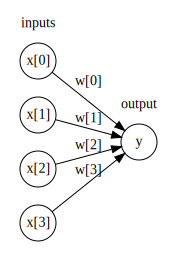

In [15]:
display(mglearn.plots.plot_logistic_regression_graph())

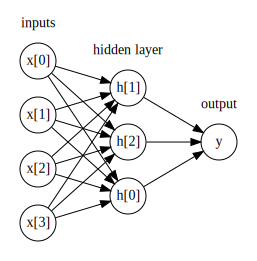

In [16]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

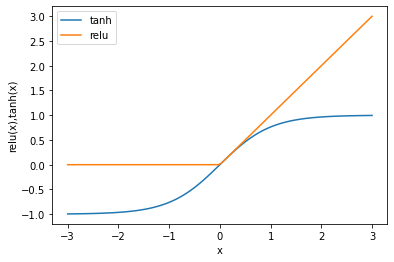

In [17]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

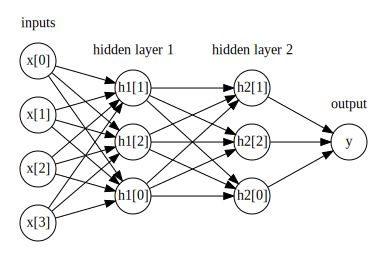

In [18]:
  mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature1')

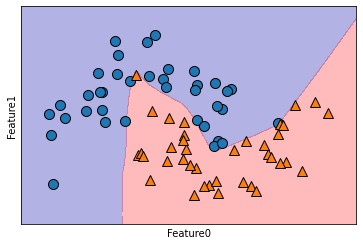

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
mlp=MLPClassifier(solver="lbfgs",random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
#MLPの隠れ層はデフォルトの100ユニット

Text(0, 0.5, 'Feature1')

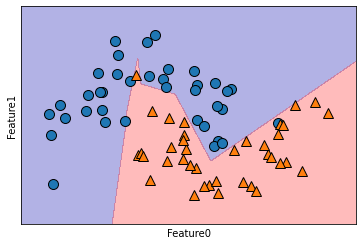

In [20]:
#MLPの隠れ層を10ユニットにした場合
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

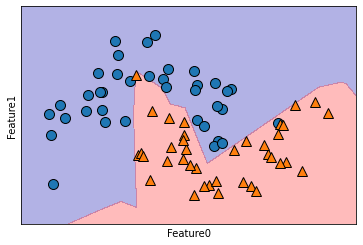

In [21]:
#MLPの隠れ層を10ユニット×2回にした場合
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature1')

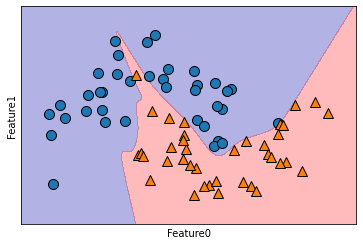

In [22]:
#MLPの隠れ層を10ユニット×2回にして活性化関数をtanhにしたとき
mlp=MLPClassifier(solver="lbfgs",activation="tanh",random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


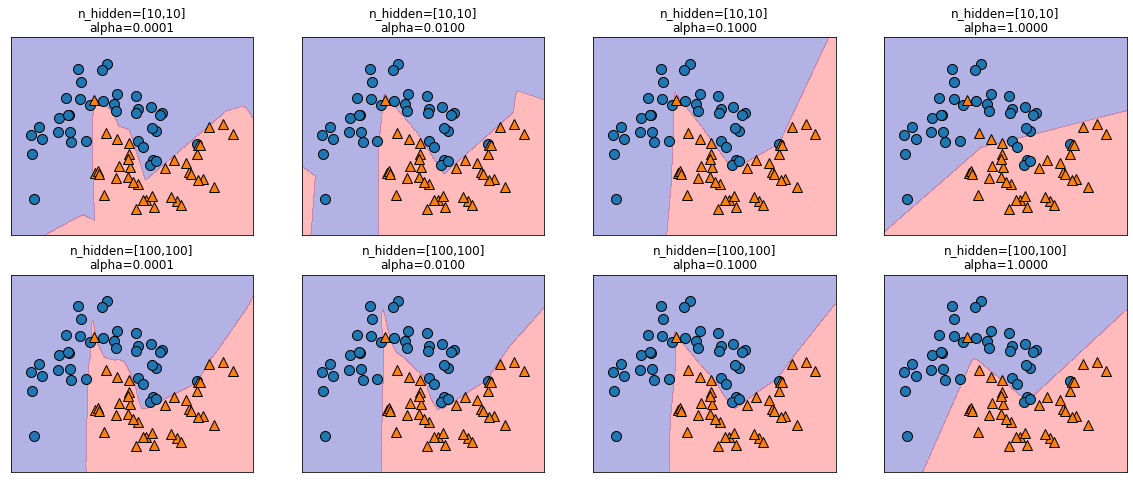

In [23]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
  for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
    mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
    ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

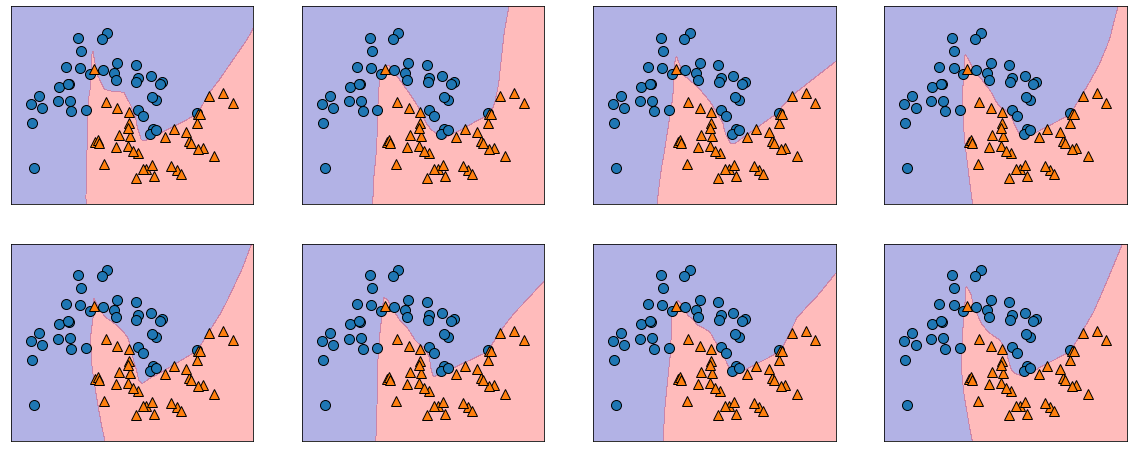

In [24]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
  mlp=MLPClassifier(solver="lbfgs",random_state=i,hidden_layer_sizes=[100,100])
  mlp.fit(X_train,y_train)
  mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
  mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [27]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [28]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(solver="lbfgs",random_state=42)
mlp.fit(X_train,y_train)
print("訓練データに対する精度:{:.2f}".format(mlp.score(X_train,y_train)))
print("訓練データに対する精度:{:.2f}".format(mlp.score(X_test,y_test)))

訓練データに対する精度:0.96
訓練データに対する精度:0.95
